Feature Engineering 2 

In [4]:
# import packages
import pandas as pd
import numpy as np
import psycopg2
from psycopg2 import Error
import matplotlib.pyplot as plt

In [5]:
USER = "***"
PSWD = "***"
HOST = "pg.analytics.northwestern.edu"
PORT = "5432"
DB_NAME = "everything2023"

In [6]:
# Connect to postgress database
try:
    # Connect to an existing database
    connection = psycopg2.connect(user = USER,
                                  password = PSWD,
                                  host = HOST,
                                  port = PORT,
                                  database = DB_NAME)

    # Create a cursor to perform database operations
    cursor = connection.cursor()
    
    # Print PostgreSQL details
    cursor.execute("SELECT version();")
    
    # Fetch result
    record = cursor.fetchone()
    
    # Print succesfull connection
    print("You are connected to - ", record, "\n")
    
except (Exception, Error) as error:
    # Print error conecting to ostgres
    print("Error while connecting to PostgreSQL", error)

You are connected to -  ('PostgreSQL 10.12 on x86_64-pc-linux-gnu, compiled by gcc (GCC) 4.8.5 20150623 (Red Hat 4.8.5-39), 64-bit',) 



## Most bought in which season

To be able to see the frequency of which stock item was bought the most each season we will see the transact table

In [ ]:
# Read trnsact table
trnsact = pd.read_sql("select * from group_9.trnsact", connection)
trnsact.head()

## Location of the store

Combined with SKSTINFO and STRINFO, Find in which cities/states the product is stored. It is a one-to-many connection.

In [7]:
# Read tables
skuinfo = pd.read_sql("select * from group_9.skuinfo", connection)
skuinfo.head()

/var/folders/46/4q6_331j7qx5_bf3yg_mv9km0000gn/T/ipykernel_285/1448087381.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  skuinfo = pd.read_sql("select * from group_9.skuinfo", connection)


,SKU,DEPT,CLASSID,UPC,STYLE,COLOR,SIZE,PACKSIZE,VENDOR,BRAND
0,3,6505,113,000400000003000,00 F55KT2,WHISPERWHITE,P8EA,1,5119207,TURNBURY
1,4,8101,002,000400000004000,22 615CZ4,SPEARMI,S,1,3311144,C A SPOR
2,5,7307,003,000400000005000,7LBS 245-01,34 SILVER,KING,1,5510554,BEAU IDE
3,8,3404,00B,000400000008000,622 F05H84,MORNING MI,2T,1,2912827,HARTSTRI
4,15,2301,004,000400000015000,126 MDU461,255CAMEL,12,1,0023272,JONES/LA


In [8]:
strinfo = pd.read_sql("select * from group_9.strinfo", connection)
strinfo.head()

/var/folders/46/4q6_331j7qx5_bf3yg_mv9km0000gn/T/ipykernel_285/2067356572.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  strinfo = pd.read_sql("select * from group_9.strinfo", connection)


,store,city,state,zip,strunidentified
0,3,ST. LOUIS,MO,63126,0
1,4,LITTLE ROCK,AR,72201,0
2,7,FORT WORTH,TX,76137,0
3,9,TEMPE,AZ,85281,0
4,60,ASPEN,CO,81611,0


In [9]:
skstinfo = pd.read_sql("select * from group_9.skstinfo", connection)
skstinfo.head()

/var/folders/46/4q6_331j7qx5_bf3yg_mv9km0000gn/T/ipykernel_285/2875751738.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  skstinfo = pd.read_sql("select * from group_9.skstinfo", connection)


,STORE,SKU,COST,RETAIL,Unknown
0,3,102,123.36,440.0,0
1,3,103,123.36,440.0,0
2,3,104,123.36,440.0,0
3,3,202,123.36,440.0,0
4,3,203,123.36,440.0,0


In [10]:
# Joining the tables
storeinfo = pd.merge(skstinfo, strinfo, left_on='STORE', right_on='store')
storeinfo

,STORE,SKU,COST,RETAIL,Unknown,store,city,state,zip,strunidentified
0,3,102,123.36,440.0,0,3,ST. LOUIS,MO,63126,0
1,3,103,123.36,440.0,0,3,ST. LOUIS,MO,63126,0
2,3,104,123.36,440.0,0,3,ST. LOUIS,MO,63126,0
3,3,202,123.36,440.0,0,3,ST. LOUIS,MO,63126,0
4,3,203,123.36,440.0,0,3,ST. LOUIS,MO,63126,0
...,...,...,...,...,...,...,...,...,...,...
1326,9906,2604,4.75,14.0,0,9906,LITTLE ROCK,AR,72201,0
1327,9906,2704,4.75,14.0,0,9906,LITTLE ROCK,AR,72201,0
1328,9906,2804,4.75,14.0,0,9906,LITTLE ROCK,AR,72201,0
1329,9906,2904,4.75,14.0,0,9906,LITTLE ROCK,AR,72201,0


In [11]:
uniquestatesperitem = storeinfo.groupby('SKU')['state'].nunique().reset_index()

In [12]:
uniquestatesperitem.sort_values(by='state', ascending=False).head()

,SKU,state
165,4209,7
32,809,7
79,2109,7
88,2309,7
92,2409,7


In [13]:
# Adding a column to see which item is most proftitable 
storeinfo['Profit'] = storeinfo['RETAIL'] - storeinfo['COST']
storeinfo

,STORE,SKU,COST,RETAIL,Unknown,store,city,state,zip,strunidentified,Profit
0,3,102,123.36,440.0,0,3,ST. LOUIS,MO,63126,0,316.64
1,3,103,123.36,440.0,0,3,ST. LOUIS,MO,63126,0,316.64
2,3,104,123.36,440.0,0,3,ST. LOUIS,MO,63126,0,316.64
3,3,202,123.36,440.0,0,3,ST. LOUIS,MO,63126,0,316.64
4,3,203,123.36,440.0,0,3,ST. LOUIS,MO,63126,0,316.64
...,...,...,...,...,...,...,...,...,...,...,...
1326,9906,2604,4.75,14.0,0,9906,LITTLE ROCK,AR,72201,0,9.25
1327,9906,2704,4.75,14.0,0,9906,LITTLE ROCK,AR,72201,0,9.25
1328,9906,2804,4.75,14.0,0,9906,LITTLE ROCK,AR,72201,0,9.25
1329,9906,2904,4.75,14.0,0,9906,LITTLE ROCK,AR,72201,0,9.25


In [14]:
profitperstate = storeinfo.groupby('state')['Profit'].nunique().reset_index()
profitperstate

,state,Profit
0,AL,3
1,AR,10
2,AZ,2
3,CO,3
4,IL,1
5,KS,1
6,LA,5
7,MO,2
8,OH,4
9,OK,6


In [15]:
profitperitem = storeinfo.groupby('SKU')['Profit'].nunique().reset_index()
profitperitem.sort_values(by='Profit', ascending=False).head()

,SKU,Profit
202,5302,10
79,2109,9
115,3009,9
165,4209,8
286,8309,8


In [16]:
storeinfo.sort_values(by='Profit', ascending=False)[['SKU','state']].head()

,SKU,state
536,7007,MO
496,1602,MO
478,102,MO
479,103,MO
480,107,MO


<Axes: xlabel='state'>

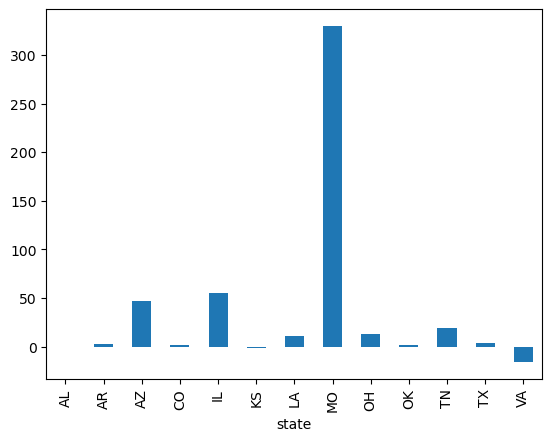

In [17]:
storeinfo.groupby('state')['Profit'].mean().plot(kind = 'bar')

We will use the state as the feature for the SKU since the price and demand might differ from state to state. Although to reduce dimension we will group the states into 5 regions - Midwest, Northeast, Pacific, Southeast, West

In [19]:
states = storeinfo['state'].unique()
states

array(['MO', 'AR', 'IL', 'TN', 'TX', 'AZ', 'KS', 'OH', 'VA', 'AL', 'LA',
       'CO', 'OK'], dtype=object)

Following is the state allocation per region

Midwest (MW): Illinois (IL), Indiana (IN), Iowa (IA), Kansas (KS), Michigan (MI), Minnesota (MN), Missouri (MO), Nebraska (NE), North Dakota (ND), Ohio (OH), South Dakota (SD), Wisconsin (WI).

Northeast (NE): Connecticut (CT), Maine (ME), Massachusetts (MA), New Hampshire (NH), New Jersey (NJ), New York (NY), Pennsylvania (PA), Rhode Island (RI), Vermont (VT).

Pacific (PAC): Alaska (AK), California (CA), Hawaii (HI), Oregon (OR), Washington (WA).

Southeast (SE): Alabama (AL), Arkansas (AR), Florida (FL), Georgia (GA), Kentucky (KY), Louisiana (LA), Mississippi (MS), North Carolina (NC), South Carolina (SC), Tennessee (TN), Virginia (VA), West Virginia (WV).

West (W): Arizona (AZ), Colorado (CO), Idaho (ID), Montana (MT), Nevada (NV), New Mexico (NM), Utah (UT), Wyoming (WY).

We will now use the above to make the Region Feature 

In [22]:
# Mapping dictionary
state_to_region = {
    'IL': 'Midwest', 'IN': 'Midwest', 'IA': 'Midwest', 'KS': 'Midwest', 
    'MI': 'Midwest', 'MN': 'Midwest', 'MO': 'Midwest', 'NE': 'Midwest', 
    'ND': 'Midwest', 'OH': 'Midwest', 'SD': 'Midwest', 'WI': 'Midwest',
    'CT': 'Northeast', 'ME': 'Northeast', 'MA': 'Northeast', 'NH': 'Northeast', 
    'NJ': 'Northeast', 'NY': 'Northeast', 'PA': 'Northeast', 'RI': 'Northeast', 
    'VT': 'Northeast', 'AK': 'Pacific', 'CA': 'Pacific', 'HI': 'Pacific', 
    'OR': 'Pacific', 'WA': 'Pacific', 'AL': 'Southeast', 'AR': 'Southeast', 
    'FL': 'Southeast', 'GA': 'Southeast', 'KY': 'Southeast', 'LA': 'Southeast', 
    'MS': 'Southeast', 'NC': 'Southeast', 'SC': 'Southeast', 'TN': 'Southeast', 
    'VA': 'Southeast', 'WV': 'Southeast', 'AZ': 'West', 'CO': 'West', 
    'ID': 'West', 'MT': 'West', 'NV': 'West', 'NM': 'West', 'UT': 'West', 
    'WY': 'West', 'TX': 'South Central'  # Including Texas as an example
}

In [24]:
# Adding Region Feature
storeinfo['Region'] = storeinfo['state'].map(state_to_region)

In [25]:
storeinfo

,STORE,SKU,COST,RETAIL,Unknown,store,city,state,zip,strunidentified,Profit,Region
0,3,102,123.36,440.0,0,3,ST. LOUIS,MO,63126,0,316.64,Midwest
1,3,103,123.36,440.0,0,3,ST. LOUIS,MO,63126,0,316.64,Midwest
2,3,104,123.36,440.0,0,3,ST. LOUIS,MO,63126,0,316.64,Midwest
3,3,202,123.36,440.0,0,3,ST. LOUIS,MO,63126,0,316.64,Midwest
4,3,203,123.36,440.0,0,3,ST. LOUIS,MO,63126,0,316.64,Midwest
...,...,...,...,...,...,...,...,...,...,...,...,...
1326,9906,2604,4.75,14.0,0,9906,LITTLE ROCK,AR,72201,0,9.25,Southeast
1327,9906,2704,4.75,14.0,0,9906,LITTLE ROCK,AR,72201,0,9.25,Southeast
1328,9906,2804,4.75,14.0,0,9906,LITTLE ROCK,AR,72201,0,9.25,Southeast
1329,9906,2904,4.75,14.0,0,9906,LITTLE ROCK,AR,72201,0,9.25,Southeast
